In [1]:
#Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#setting up DataFrame
fixed_mortgage_index = "../Resources/FRED 30-Year Fixed Mortgage Index from Oct 2017-Present.csv"
fmi = pd.read_csv(fixed_mortgage_index)
fmi_df = pd.DataFrame(fmi)
fmi_df

,DATE,OBMMIFHA30YF
0,2017-10-23,4.244
1,2017-10-24,4.256
2,2017-10-25,4.298
3,2017-10-26,4.288
4,2017-10-27,4.281
...,...,...
1300,2022-10-17,6.772
1301,2022-10-18,6.776
1302,2022-10-19,6.788
1303,2022-10-20,6.893


In [3]:
#Checking Data Types
display(fmi_df.dtypes)

DATE            object
OBMMIFHA30YF    object
dtype: object

In [5]:
#Changing the DATE data type to datetime
fmi_df['DATE'] = pd.to_datetime(fmi_df['DATE'])
display(fmi_df.dtypes)

#Changing the Rate data type to float
fmi_df['OBMMIFHA30YF'] = pd.to_numeric(fmi_df.OBMMIFHA30YF, errors='coerce')

DATE            datetime64[ns]
OBMMIFHA30YF           float64
dtype: object

In [6]:
#Getting a sample from our cleaned data we don't want to keep 
subset = fmi_df.sample(frac=0.9)
#verifying the data we do not want in the sample
subset.shape

(1174, 2)

In [7]:
#viewing a portion of the sample subset
subset.head()

,DATE,OBMMIFHA30YF
348,2019-02-21,4.847
822,2020-12-16,2.821
569,2019-12-27,3.939
1041,2021-10-19,3.323
507,2019-10-02,3.914


In [8]:
#Removing data not in our we do not want in our sample
cleaned_df = pd.DataFrame(fmi_df.drop(labels=subset.index))
cleaned_df

,DATE,OBMMIFHA30YF
3,2017-10-26,4.288
14,2017-11-10,NaN
29,2017-12-01,4.289
30,2017-12-04,4.270
50,2018-01-01,NaN
...,...,...
1261,2022-08-23,5.542
1277,2022-09-14,5.903
1287,2022-09-28,6.372
1298,2022-10-13,6.787


In [9]:
#verifying data types
display(cleaned_df.dtypes)

DATE            datetime64[ns]
OBMMIFHA30YF           float64
dtype: object

In [10]:
#finding the mean of our sample dataset
rate = cleaned_df['OBMMIFHA30YF']
mean_numpy = np.mean(rate)
print(f"The Average 30-Year FMI rate of our sample is {mean_numpy}%")

The Average 30-Year FMI rate of our sample is 4.237330645161291%


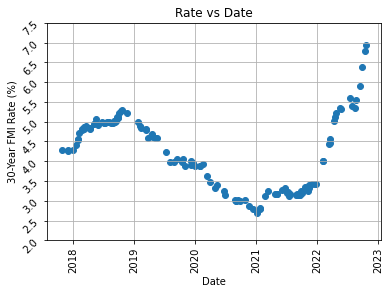

In [12]:
#plotting the cleaned data
y = cleaned_df['OBMMIFHA30YF']
x = cleaned_df['DATE']
plt.scatter(cleaned_df['DATE'], cleaned_df['OBMMIFHA30YF'], marker='o')

plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.yticks(np.arange(2, 8, 0.5))

#Formatting Scatter Plot
plt.title("Rate vs Date")
plt.ylabel("30-Year FMI Rate (%)")
plt.xlabel("Date")
plt.grid()

plt.savefig("../Images/30yFMIRatevsDate.png")
plt.show()

In [13]:
#Finding the Pre-pandemic High, Pandemic Low, and Post-Pandemic High
pre_pan_date = cleaned_df.loc[(cleaned_df['DATE'] >= '2017-11-16')
                              & (cleaned_df['DATE'] < '2020,03,01')]
max_pre_pan = pre_pan_date['OBMMIFHA30YF'].max()
# print(pre_pan_date.head())
print(f"The Max 30-Year FMI Rate Pre-Pandemic is {max_pre_pan}%")

min_rate = cleaned_df['OBMMIFHA30YF'].min()
print(f"The Min 30-Year FMI Rate is {min_rate}%")

max_rate = cleaned_df['OBMMIFHA30YF'].max()
print(f"The Max 30-Year FMI Rate is {max_rate}%")

The Max 30-Year FMI Rate Pre-Pandemic is 5.288%
The Min 30-Year FMI Rate is 2.703%
The Max 30-Year FMI Rate is 6.936%
